Checking if the external inputs (EC, CA3, MS) are behaving as we expect them to

Criteria
1. Each neuron in the external regions are outputting a unique spike train, but all with the same rates
2. Each postsynaptic neuron is receiving the same realization of the spike train from each presynaptic neuron 

In [1]:
import sys
import os

root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(root)

In [2]:
import numpy as np
import nest
import matplotlib.pyplot as plt

from params import pyr_hcamp_deco2012
from params import int_hcamp_deco2012
from scripts import visualizations


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [3]:
#Runtime
runtime = 200

#Gamma rate
gamma_rate = 40

#Theta rate 
theta_rate = 7


Nov 29 14:38:28 NodeManager::prepare_nodes [Info]: 
    Preparing 16 nodes for simulation.

Nov 29 14:38:28 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 16
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Nov 29 14:38:28 SimulationManager::run [Info]: 
    Simulation finished.


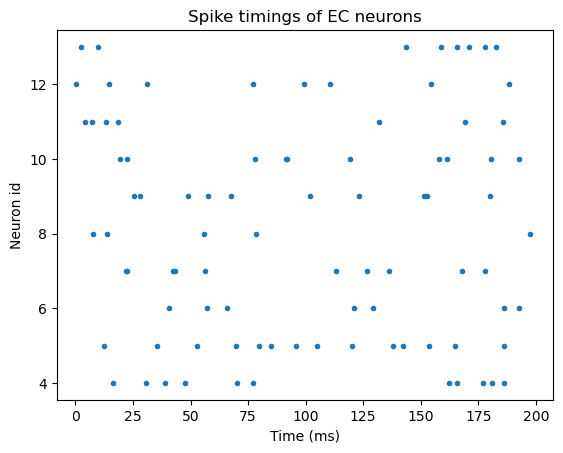

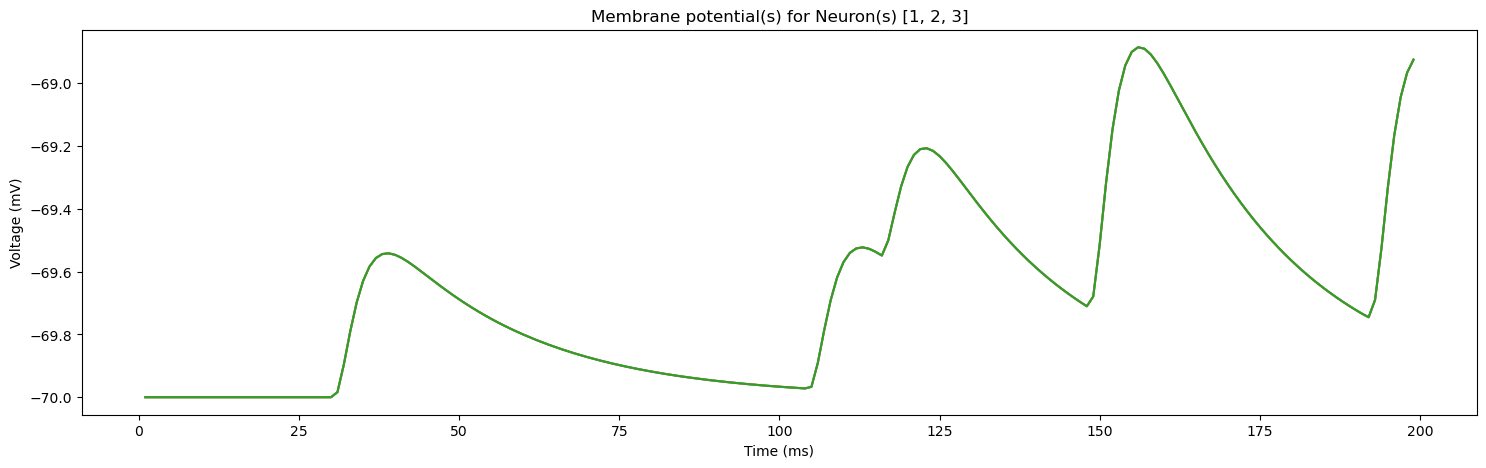

In [4]:
pyr = nest.Create('iaf_psc_alpha', n=3, params=pyr_hcamp_deco2012.params)

ec_input = nest.Create('poisson_generator', n=10)
ec_input.set(rate=gamma_rate)
ec_parrot = nest.Create('parrot_neuron', n=1)
nest.Connect(ec_input[0], ec_parrot[0])

nest.Connect(ec_parrot, pyr, syn_spec={'weight': 35})

Vm_recorder = nest.Create('multimeter')
Vm_recorder.set(record_from=['V_m'])
nest.Connect(Vm_recorder, pyr)
spike_recorder = nest.Create('spike_recorder')
nest.Connect(ec_input, spike_recorder)

nest.Simulate(200)

visualizations.plot_spikes_from_device(spike_recorder, 'Spike timings of EC neurons') 
visualizations.plot_vms_from_device(Vm_recorder, [1,2,3])

nest.ResetKernel()